In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("Downloads/StudentsPerformance.csv")

In [3]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [4]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
#1. Find out how many males and females participated in the test.

data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

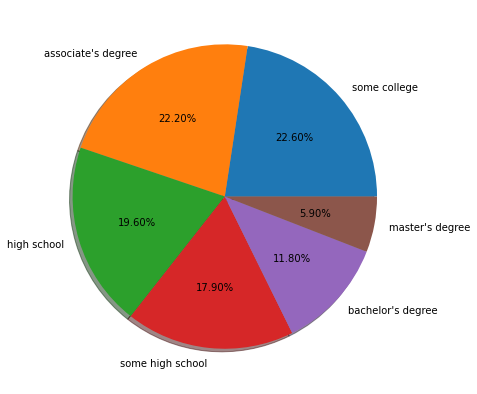

In [6]:
plt.figure(figsize=(7,7))
l=data['parental level of education'].value_counts()
plt.pie(l,labels=l.index,shadow=True, textprops={'fontsize': 10},autopct='%1.2f%%')
plt.show()

In [7]:
#insights: 1.Least qualification is some high school
#        :2.Master's degree has been qualified by less 
#        :3.Major people has gone to college for degrees.


In [8]:
#3. Who scores the most on average for math, reading and writing based on Gender
data1=data.groupby(by="gender").describe()

In [9]:
data1


math score                                                       \
            count       mean        std   min   25%   50%   75%    max   
gender                                                                   
female      518.0  63.376448  16.029928   0.0  54.0  65.0  74.0  100.0   
male        482.0  68.821577  14.556411  27.0  59.0  69.0  79.0  100.0   

       reading score             ...              writing score             \
               count       mean  ...   75%    max         count       mean   
gender                           ...                                         
female         518.0  72.590734  ...  83.0  100.0         518.0  72.467181   
male           482.0  65.545643  ...  76.0  100.0         482.0  63.446058   

                                                  
              std   min   25%   50%   75%    max  
gender                                            
female  14.844842  10.0  64.0  74.0  82.0  100.0  
male    14.227225  15.0  53.0  64.0  74.0  100.0  

[2 rows x 24 columns]

In [10]:
#based on test preparation course
data2=data.groupby(by="test preparation course").describe()

In [11]:
data2

math score                                         \
                             count      mean        std   min   25%   50%   
test preparation course                                                     
completed                    358.0  69.96648  14.521847  23.0  61.0  70.0   
none                         642.0  63.78972  15.705689   0.0  54.0  64.0   

                                     reading score             ...        \
                          75%    max         count       mean  ...   75%   
test preparation course                                        ...         
completed                79.0  100.0         358.0  74.175978  ...  84.0   
none                     74.0  100.0         642.0  66.417445  ...  76.0   

                               writing score                              \
                           max         count       mean        std   min   
test preparation course                                                    
completed                100.0         358.0  74.684358  13.236412  36.0   
none                     100.0         642.0  64.457944  15.041667  10.0   

                                                   
                          25%   50%    75%    max  
test preparation course                            
completed                67.0  76.0  83.75  100.0  
none                     54.0  65.0  74.00  100.0  

[2 rows x 24 columns]

<Figure size 2160x2160 with 0 Axes>

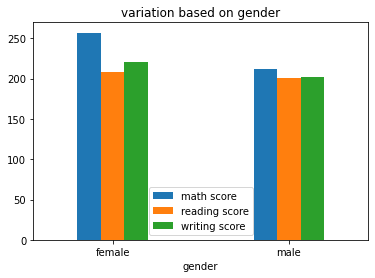

In [13]:
#4. What do you think about the scoring variation for math, reading and writing based on Gender
ax=plt.figure(figsize=(30,30))
data.groupby('gender').var().plot(kind='bar',width=0.4)
plt.xticks(rotation=0)
plt.title("variation based on gender")

plt.show()

In [14]:
#insights: scoring variation for math,reading and writing  score based on Gender is more for female, maths score is higher comparing to oth 

<Figure size 1080x1080 with 0 Axes>

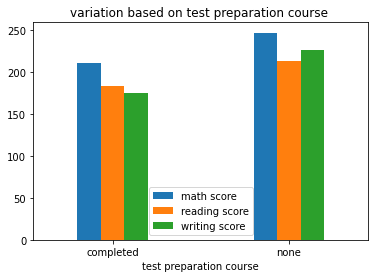

In [15]:
#based on test preparation course

plt.figure(figsize=(15,15))
data.groupby('test preparation course').var().plot(kind='bar',width=0.4)
plt.xticks(rotation=0)
plt.title("variation based on test preparation course ")
plt.show()

In [16]:
#insights:scoring variation for math, reading and writing based on test preparation course is more for none and less for who have completed.

In [17]:
#5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.
data3=data.sort_values(by="math score",ascending=False)

In [18]:
data3

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
2,female,group B,some high school,free/reduced,none,18,32,28
51,female,group C,some high school,free/reduced,none,13,41,51
3,female,group B,some college,standard,none,11,38,32
1,female,group B,high school,free/reduced,none,8,24,23


In [19]:
data3.quantile(0.25)

math score       57.0
reading score    59.0
writing score    58.0
Name: 0.25, dtype: float64